In [107]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random as rnd

In [108]:
data = pd.read_csv('data/X_train.csv', index_col='PassengerId')

In [109]:
y = data["Survived"]
X = data.drop('Survived', axis=1)

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [111]:
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

### Logistic Regression

In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
logreg_acc = accuracy_score(y_test, y_pred)
logreg_acc

0.8156424581005587

In [119]:
(pd.DataFrame(logreg.coef_, index=['Correlation'], columns=X.columns).
 T.sort_values(by='Correlation', ascending=False))

,Correlation
Sex,2.086598
status,0.448496
Embarked,0.192348
is_alone,-0.044913
age*class,-0.121076
Fare,-0.168891
Age,-0.310571
Pclass,-1.146252


### Support Vector Machines

In [122]:
from sklearn.svm import SVC, LinearSVC


svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
svc_acc = accuracy_score(y_test, y_pred)
svc_acc

0.8324022346368715

### KNeighborsClassifier

In [124]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, y_pred)
knn_acc

0.8100558659217877

### GaussianNB

In [125]:
from sklearn.naive_bayes import GaussianNB


gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
gaussian_acc = accuracy_score(y_test, y_pred)
gaussian_acc

0.7486033519553073

### Perceptron

In [126]:
from sklearn.linear_model import Perceptron


perceptron = Perceptron()
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)
perceptron_acc = accuracy_score(y_test, y_pred)
perceptron_acc

0.7486033519553073

### Linear SVC

In [128]:
from sklearn.svm import SVC, LinearSVC


linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
y_pred = linear_svc.predict(X_test)
linear_svc_acc = accuracy_score(y_test, y_pred)
linear_svc_acc

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8044692737430168

### Stochastic Gradient Descent

In [131]:
from sklearn.linear_model import SGDClassifier


sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
sgd_acc = accuracy_score(y_test, y_pred)
sgd_acc

0.7262569832402235

### Decision Tree

In [132]:
from sklearn.tree import DecisionTreeClassifier


decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
acc_decision_tree = accuracy_score(y_test, y_pred)
acc_decision_tree

0.8268156424581006

### Random Forest

In [133]:
from sklearn.ensemble import RandomForestClassifier


random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
acc_random_forest = accuracy_score(y_test, y_pred)
acc_random_forest

0.8379888268156425

### Градиентный бустинг

In [134]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [135]:
gbdt = GradientBoostingClassifier(random_state=123)
kfold = KFold(n_splits=4, shuffle=True, random_state=123)

In [136]:
param_grid = {
    "max_depth": [2, 3],
    "n_estimators": [50, 100, 150],
    "learning_rate": [0.01, 0.05, 0.1],
    # "min_child_weight":[4, 5, 6],
    "subsample": [0.8, 0.9, 1]
}

In [137]:
CV_gbdt = GridSearchCV(estimator=gbdt, param_grid=param_grid,
                      scoring='accuracy', cv=kfold, verbose=1000)

In [138]:
CV_gbdt.fit(X_train, y_train)

Fitting 4 folds for each of 54 candidates, totalling 216 fits
[CV 1/4; 1/54] START learning_rate=0.01, max_depth=2, n_estimators=50, subsample=0.8
[CV 1/4; 1/54] END learning_rate=0.01, max_depth=2, n_estimators=50, subsample=0.8;, score=0.798 total time=   0.0s
[CV 2/4; 1/54] START learning_rate=0.01, max_depth=2, n_estimators=50, subsample=0.8
[CV 2/4; 1/54] END learning_rate=0.01, max_depth=2, n_estimators=50, subsample=0.8;, score=0.764 total time=   0.0s
[CV 3/4; 1/54] START learning_rate=0.01, max_depth=2, n_estimators=50, subsample=0.8
[CV 3/4; 1/54] END learning_rate=0.01, max_depth=2, n_estimators=50, subsample=0.8;, score=0.803 total time=   0.0s
[CV 4/4; 1/54] START learning_rate=0.01, max_depth=2, n_estimators=50, subsample=0.8
[CV 4/4; 1/54] END learning_rate=0.01, max_depth=2, n_estimators=50, subsample=0.8;, score=0.758 total time=   0.0s
[CV 1/4; 2/54] START learning_rate=0.01, max_depth=2, n_estimators=50, subsample=0.9
[CV 1/4; 2/54] END learning_rate=0.01, max_depth=

GridSearchCV(cv=KFold(n_splits=4, random_state=123, shuffle=True),
             estimator=GradientBoostingClassifier(random_state=123),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [2, 3], 'n_estimators': [50, 100, 150],
                         'subsample': [0.8, 0.9, 1]},
             scoring='accuracy', verbose=1000)

In [139]:
CV_gbdt.best_score_

0.8089887640449438

In [140]:
bp = CV_gbdt.best_params_
bp

{'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 150, 'subsample': 0.8}

In [141]:
from sklearn.metrics import accuracy_score


gbc = GradientBoostingClassifier(random_state=123, 
                                 **bp)
gbc.fit(X_train, y_train)

print(f"Accuracy на тренировочной выборке - {accuracy_score(y_train, gbc.predict(X_train))}")
print(f"Accuracy на тестовой выборке - {accuracy_score(y_test, gbc.predict(X_test))}")

Accuracy на тренировочной выборке - 0.8412921348314607
Accuracy на тестовой выборке - 0.8491620111731844


### Рандом форест

In [142]:
from sklearn.ensemble import RandomForestClassifier

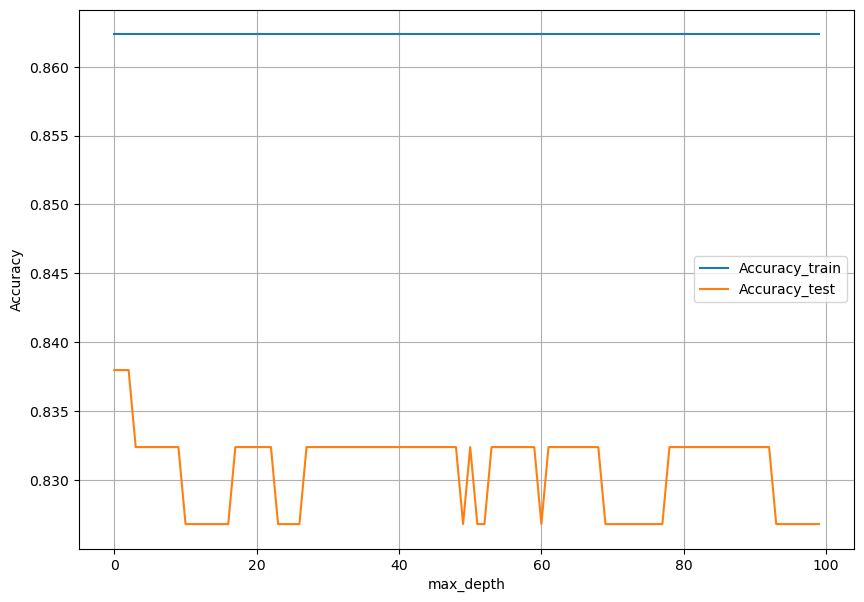

In [143]:
max_depth = 150
train_loss = []
test_loss = []

for i in range(50, max_depth):
    rf = RandomForestClassifier(n_estimators=i, max_depth=15, random_state=123, n_jobs=-1)
    rf.fit(X_train, y_train)
    train_loss.append(accuracy_score(y_train, rf.predict(X_train)))
    test_loss.append(accuracy_score(y_test, rf.predict(X_test)))
    
plt.figure(figsize = (10, 7))
plt.grid()
plt.plot(train_loss, label = 'Accuracy_train')
plt.plot(test_loss, label = 'Accuracy_test')
plt.ylabel('Accuracy')
plt.xlabel('max_depth')
plt.legend();

In [145]:
param_grid = { "criterion" : ["gini", "entropy"],
              "min_samples_leaf" : [1, 5, 10], 
              "min_samples_split" : [2, 4, 10, 12, 16], 
              "n_estimators": [50, 100, 400, 700, 1000]}

rf = RandomForestClassifier(random_state=123, n_jobs=-1)
kfold = KFold(n_splits=4, shuffle=True, random_state=123)

CVrf = GridSearchCV(estimator=rf, param_grid=param_grid,
                      scoring='accuracy', cv=kfold, verbose=1000)
CVrf.fit(X_train, y_train)

Fitting 4 folds for each of 150 candidates, totalling 600 fits
[CV 1/4; 1/150] START criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 1/4; 1/150] END criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.798 total time=   0.0s
[CV 2/4; 1/150] START criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 2/4; 1/150] END criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.758 total time=   0.0s
[CV 3/4; 1/150] START criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 3/4; 1/150] END criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.820 total time=   0.0s
[CV 4/4; 1/150] START criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 4/4; 1/150] END criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.758 total time=   0.0s
[CV 1/4; 2/150] START criterion=gini, min_samples_lea

GridSearchCV(cv=KFold(n_splits=4, random_state=123, shuffle=True),
             estimator=RandomForestClassifier(n_jobs=-1, random_state=123),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 4, 10, 12, 16],
                         'n_estimators': [50, 100, 400, 700, 1000]},
             scoring='accuracy', verbose=1000)

In [146]:
CVrf.best_score_

0.8019662921348314

In [147]:
CVrf.best_params_

{'criterion': 'entropy',
 'min_samples_leaf': 1,
 'min_samples_split': 16,
 'n_estimators': 1000}

In [152]:
rfc = RandomForestClassifier(max_depth=9, **{'criterion': 'entropy',
                                             'min_samples_leaf': 1,
                                             'min_samples_split': 16,
                                             'n_estimators': 1000})
rfc.fit(X_train, y_train)

print(f"Accuracy_train: {accuracy_score(y_train, rfc.predict(X_train))}")
print(f"Accuracy_test: {accuracy_score(y_test, rfc.predict(X_test))}")

Accuracy_train: 0.8412921348314607
Accuracy_test: 0.8547486033519553


In [149]:
rfc.feature_importances_

array([0.13325718, 0.24213322, 0.05394795, 0.12409083, 0.06525764,
       0.24759647, 0.03852625, 0.09519046])

In [150]:
X_train

,Pclass,Sex,Age,Fare,Embarked,status,is_alone,age*class
PassengerId,,,,,,,,
330,1,1,0,3,1,2,0,0
750,3,0,1,0,2,1,1,3
204,3,0,2,0,1,1,1,6
422,3,0,1,0,2,1,1,3
98,1,0,1,3,1,1,0,1
...,...,...,...,...,...,...,...,...
99,2,1,2,2,0,3,0,4
323,2,1,1,1,2,2,1,2
383,3,0,1,1,0,1,1,3
